In [1]:
#ND_verse
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
demand_forecasting = pd.read_csv("demand_forecasting_data.csv")

In [4]:
demand_forecasting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17019 entries, 0 to 17018
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        17019 non-null  object
 1   product_id  17019 non-null  object
 2   product     17019 non-null  object
 3   category    17019 non-null  object
 4   city        17019 non-null  object
 5   holiday     17019 non-null  object
 6   units_sold  17019 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 930.9+ KB


In [5]:
dataset=pd.DataFrame(demand_forecasting)

In [6]:
dataset

,date,product_id,product,category,city,holiday,units_sold
0,2024-06-01,P001,Milk,Dairy,Mumbai,None,64
1,2024-06-01,P001,Milk,Dairy,Hyderabad,None,73
2,2024-06-01,P001,Milk,Dairy,Pune,None,57
3,2024-06-01,P002,Bread,Bakery,Bangalore,None,106
4,2024-06-01,P002,Bread,Bakery,Chennai,None,74
...,...,...,...,...,...,...,...
17014,2024-11-30,P030,Moisturizer,Health,Mumbai,None,70
17015,2024-11-30,P030,Moisturizer,Health,Delhi,None,93
17016,2024-11-30,P031,Cough Syrup,Health,Kolkata,None,59
17017,2024-11-30,P031,Cough Syrup,Health,Mumbai,None,52


In [7]:
dataset.isnull().sum()

date          0
product_id    0
product       0
category      0
city          0
holiday       0
units_sold    0
dtype: int64

In [8]:
dataset.describe()

,units_sold
count,17019.000000
mean,65.039074
std,24.635840
min,20.000000
25%,45.000000
50%,65.000000
75%,85.000000
max,148.000000


In [9]:
dataset.head()

,date,product_id,product,category,city,holiday,units_sold
0,2024-06-01,P001,Milk,Dairy,Mumbai,None,64
1,2024-06-01,P001,Milk,Dairy,Hyderabad,None,73
2,2024-06-01,P001,Milk,Dairy,Pune,None,57
3,2024-06-01,P002,Bread,Bakery,Bangalore,None,106
4,2024-06-01,P002,Bread,Bakery,Chennai,None,74


In [10]:
dataset['date'] = pd.to_datetime(demand_forecasting['date'])

In [11]:
dataset.head()

,date,product_id,product,category,city,holiday,units_sold
0,2024-06-01,P001,Milk,Dairy,Mumbai,None,64
1,2024-06-01,P001,Milk,Dairy,Hyderabad,None,73
2,2024-06-01,P001,Milk,Dairy,Pune,None,57
3,2024-06-01,P002,Bread,Bakery,Bangalore,None,106
4,2024-06-01,P002,Bread,Bakery,Chennai,None,74


 EDA

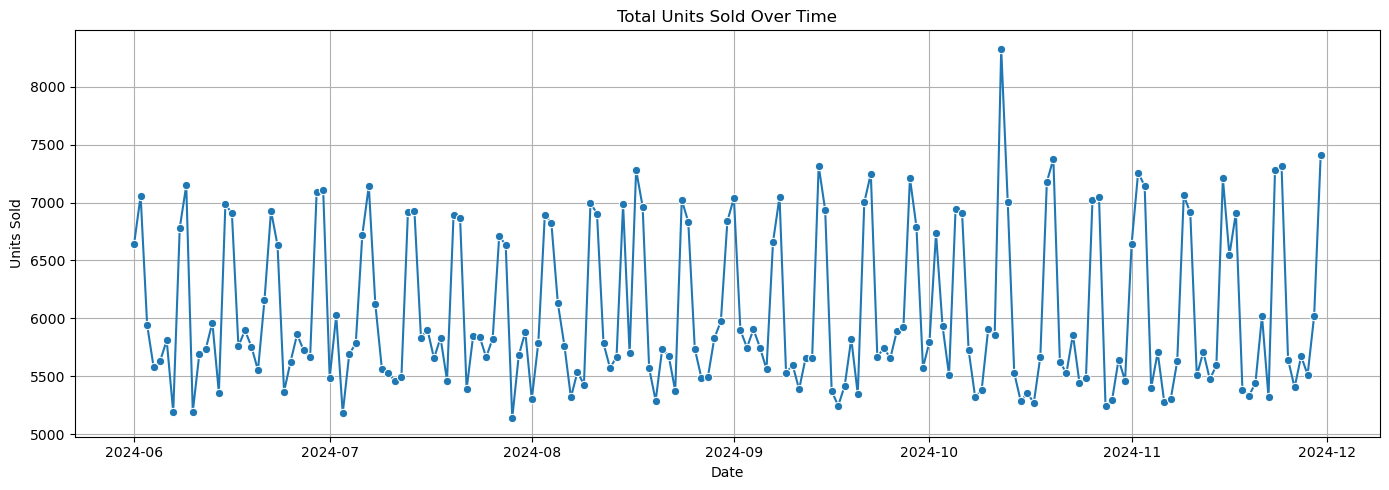

In [13]:

daily_sales = dataset.groupby('date')['units_sold'].sum().reset_index()



plt.figure(figsize=(14, 5))
sns.lineplot(data=daily_sales, x='date', y='units_sold', marker='o')
plt.title("Total Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


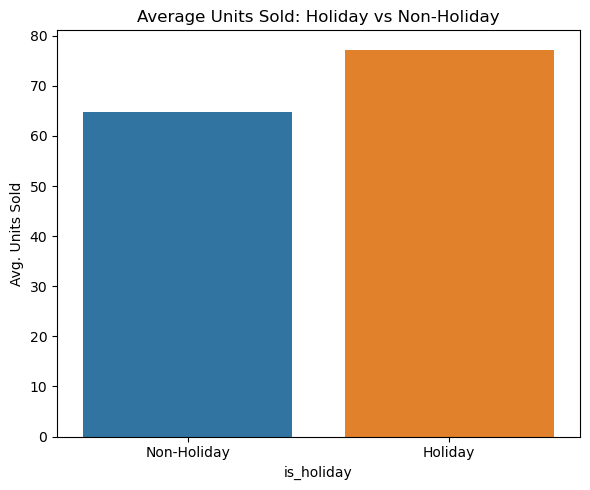

In [14]:

dataset['is_holiday'] = dataset['holiday'].apply(lambda x: x != 'None')

# holiday/non-holiday average sales
holiday_sales = dataset.groupby('is_holiday')['units_sold'].mean().reset_index()


plt.figure(figsize=(6, 5))
sns.barplot(data=holiday_sales, x='is_holiday', y='units_sold')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.title("Average Units Sold: Holiday vs Non-Holiday")
plt.ylabel("Avg. Units Sold")
plt.tight_layout()
plt.show()


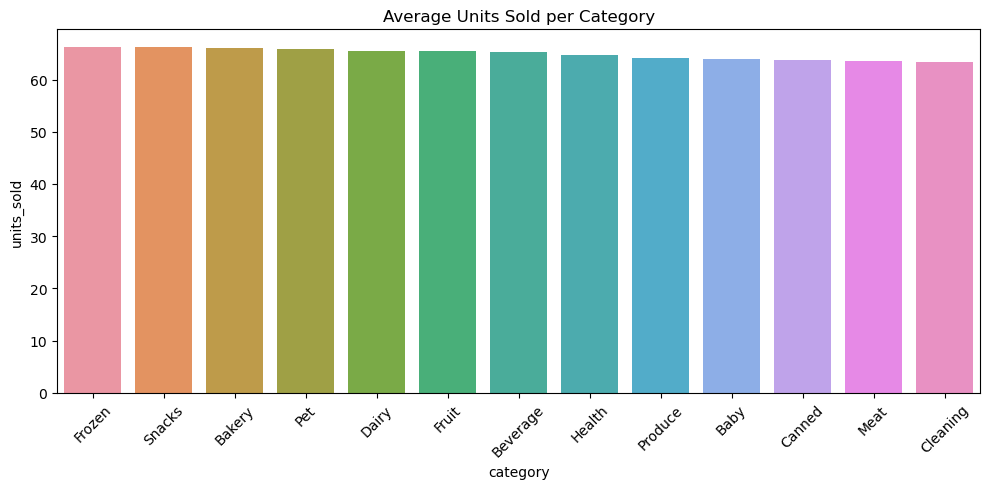

In [15]:
category_sales = dataset.groupby('category')['units_sold'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=category_sales, x='category', y='units_sold')
plt.title("Average Units Sold per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


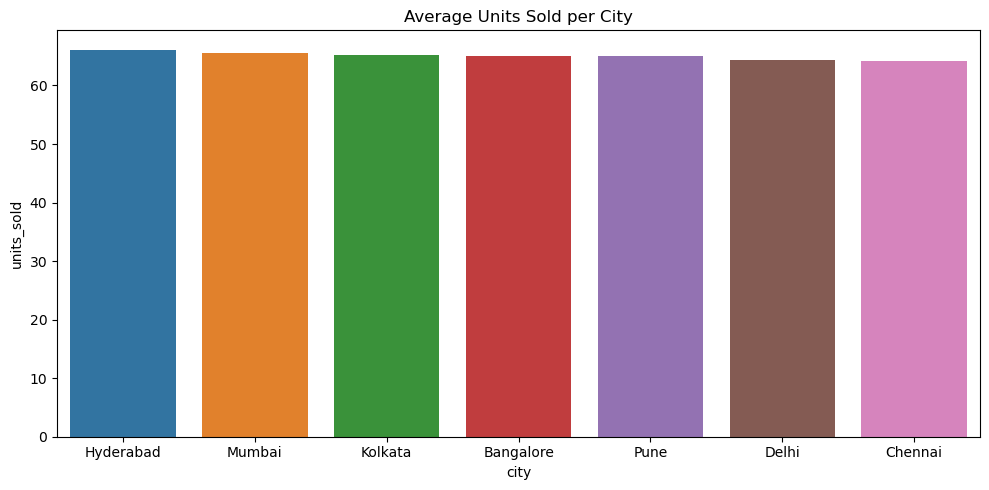

In [16]:
city_sales = dataset.groupby('city')['units_sold'].mean().sort_values(ascending=False).reset_index()
city_sales = dataset.groupby('city')['units_sold'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=city_sales, x='city', y='units_sold')
plt.title("Average Units Sold per City")
plt.tight_layout()
plt.show()


From the above two visualizations it can be seen that the product demands are balanced and generally high in high tech cites

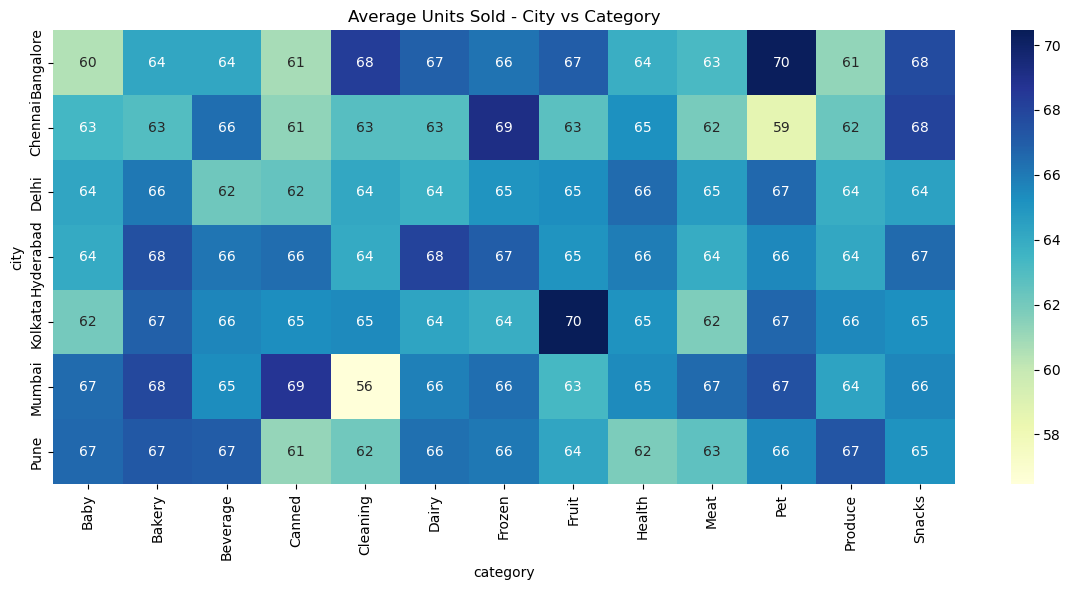

In [17]:
pivot = dataset.pivot_table(index='city', columns='category', values='units_sold', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Units Sold - City vs Category")
plt.tight_layout()
plt.show()


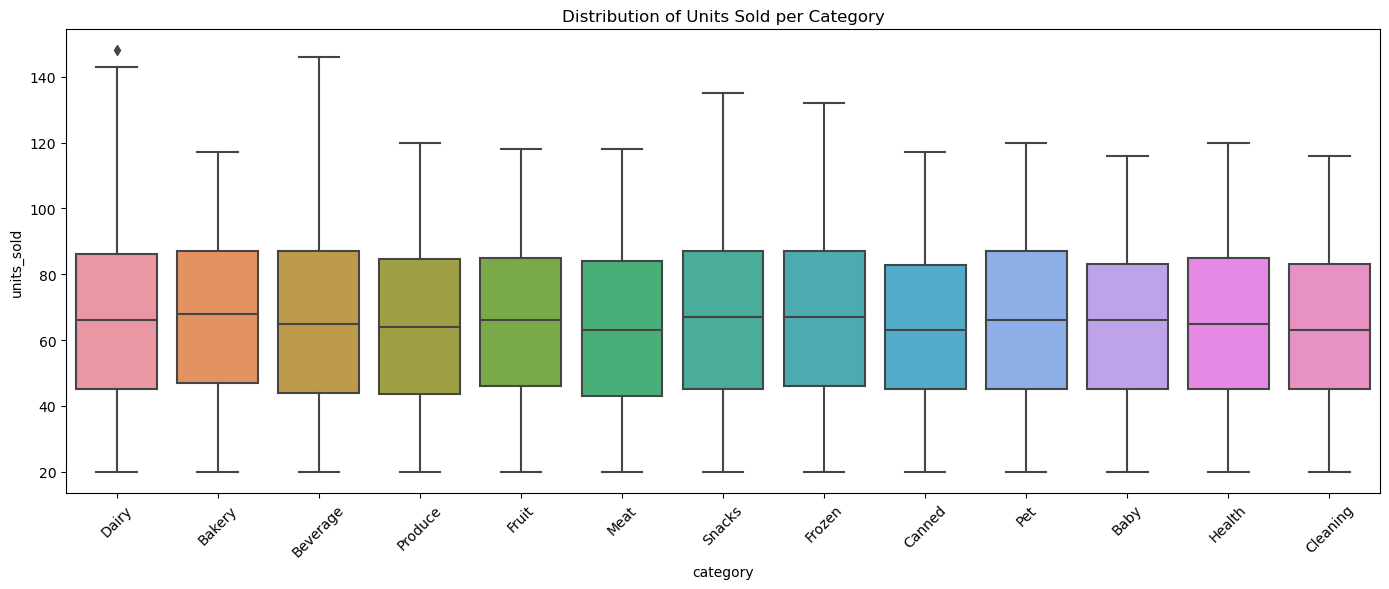

In [18]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=dataset, x='category', y='units_sold')
plt.xticks(rotation=45)
plt.title("Distribution of Units Sold per Category")
plt.tight_layout()
plt.show()


In [20]:
pip install autots

  Obtaining dependency information for autots from https://files.pythonhosted.org/packages/7f/ff/be9d5a7915da828e06dc3a700cb8436364ef17769fc6702f4d21ad09447d/autots-0.6.21-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/974.9 kB ? eta -:--:--
   -- ------------------------------------- 71.7/974.9 kB 1.3 MB/s eta 0:00:01
   ------- -------------------------------- 194.6/974.9 kB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 286.7/974.9 kB 2.0 MB/s eta 0:00:01
   ---------------- ----------------------- 409.6/974.9 kB 2.1 MB/s eta 0:00:01
   --------------------- ------------------ 522.2/974.9 kB 2.3 MB/s eta 0:00:01
   ------------------------ --------------- 604.2/974.9 kB 2.1 MB/s eta 0:00:01
   ----------------------------- ---------- 716.8/974.9 kB 2.1 MB/s eta 0:00:01
   ------------------------------ --------- 737.3/974.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------- ----- 829.4/974.9 kB 1.9 MB/s eta 0:00:01
   ---------

In [22]:
import pandas as pd

# Group total units sold per day
df_autots = dataset.groupby('date')['units_sold'].sum().reset_index()
df_autots.columns = ['datetime', 'value']  # AutoTS expects these column names

print(df_autots.head())



    datetime  value
0 2024-06-01   6643
1 2024-06-02   7059
2 2024-06-03   5943
3 2024-06-04   5577
4 2024-06-05   5634


In [23]:
from autots import AutoTS

# Initialize model
model = AutoTS(
    forecast_length=30,          # Predict next 30 days
    frequency='D',               # Daily data
    ensemble='simple',           # Use simple ensemble for fast results
    model_list="fast",           # Choose 'fast' for quick models
    max_generations=5,           # Try up to 5 generations of models
    num_validations=2,           # Cross-validation folds
    validation_method="backwards"
)

# Fit model
model = model.fit(df_autots, date_col='datetime', value_col='value', id_col=None)


Using 5 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 5
Model Number: 2 with model AverageValueNaive in generation 0 of 5
Model Number: 3 with model AverageValueNaive in generation 0 of 5
Model Number: 4 with model DatepartRegression in generation 0 of 5
Model Number: 5 with model DatepartRegression in generation 0 of 5
Model Number: 6 with model DatepartRegression in generation 0 of 5
Model Number: 7 with model DatepartRegression in generation 0 of 5
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 5
Model Number: 9 with model ETS in generation 0 of 5
Model Number: 10 with model GLM in generation 0 of 5
Model Number: 11 with model GLM in generation 0 of 5
Model Number: 12 with model GLS in generation 0 of 5
Model Number: 13 with model GLS in generation 0 of 5
Mode

C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 58 with model ETS in generation 0 of 5
Model Number: 59 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 59 in generation 0: VAR
Model Number: 60 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 60 in generation 0: VECM
Model Number: 61 with model WindowRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 61 in generation 0: WindowRegression
Model Number: 62 with model DatepartRegression in generation 0 of 5
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'simple_binarized'}, 'fillna': 'mean'}} with error ValueError('The number of classes has to be greater than one; got 1 class')") in model 62 in generation 0: DatepartRegression
Mo

Template Eval Error: ValueError('operands could not be broadcast together with shapes (120,1) (30,1) ') in model 119 in generation 0: LastValueNaive
Model Number: 120 with model MAR in generation 0 of 5
Model Number: 121 with model AverageValueNaive in generation 0 of 5
Model Number: 122 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 122 in generation 0: VECM
Model Number: 123 with model LastValueNaive in generation 0 of 5
Model Number: 124 with model NVAR in generation 0 of 5
Model Number: 125 with model MAR in generation 0 of 5
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params fake_date {'0': {}, '1': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}, '3': {'rows': 5}, '4': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays

C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 164 with model LastValueNaive in generation 0 of 5
Model Number: 165 with model FFT in generation 0 of 5
Model Number: 166 with model DatepartRegression in generation 0 of 5
New Generation: 1 of 5
Model Number: 167 with model AverageValueNaive in generation 1 of 5
Model Number: 168 with model ConstantNaive in generation 1 of 5
Model Number: 169 with model GLM in generation 1 of 5


C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 170 with model AverageValueNaive in generation 1 of 5
Model Number: 171 with model ETS in generation 1 of 5
Model Number: 172 with model MetricMotif in generation 1 of 5
Model Number: 173 with model ConstantNaive in generation 1 of 5
Model Number: 174 with model LastValueNaive in generation 1 of 5
Model Number: 175 with model BallTreeMultivariateMotif in generation 1 of 5
Model Number: 176 with model AverageValueNaive in generation 1 of 5
Model Number: 177 with model GLM in generation 1 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 177 in generation 1: GLM
Model Number: 178 with model DatepartRegression in generation 1 of 5


C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 179 with model MAR in generation 1 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (210,1) (30,1) ') in model 179 in generation 1: MAR
Model Number: 180 with model SeasonalityMotif in generation 1 of 5
Model Number: 181 with model LastValueNaive in generation 1 of 5
Model Number: 182 with model LastValueNaive in generation 1 of 5
Model Number: 183 with model SeasonalNaive in generation 1 of 5
Model Number: 184 with model FFT in generation 1 of 5
Model Number: 185 with model SectionalMotif in generation 1 of 5
Model Number: 186 with model BasicLinearModel in generation 1 of 5
Template Eval Error: Exception('Transformer PCA failed on fit from params ffill {\'0\': {\'lag\': 1, \'fill\': \'zero\'}, \'1\': {\'cutoff\': 0.8, \'reverse\': False, \'on_transform\': True, \'on_inverse\': False}, \'2\': {\'whiten\': False, \'n_components\': 10}, \'3\': {\'fixed\': True, \'window\': 28, \'macro_micro\': False, \'center\': False}, \'4\': {}} 

C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 193 with model ETS in generation 1 of 5
Model Number: 194 with model UnivariateMotif in generation 1 of 5
Model Number: 195 with model GLM in generation 1 of 5
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params pchip {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': True, 'use_hebrew_holidays': True, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'minmax', 'method_params': {'alpha': 0.03}, 'fillna': 'fake_date', 'transform_dict': None, 'isolated_only': False, 'on_inverse': False}, 'remove_excess_anomalies': True, 'impact': 'median_value', 'regression_params': {}}} with error ValueError('more than 1 year of data is required for holiday detection.')") in model 195 in generation 1: GLM
Model Number: 196 with model KalmanStateSpace in generation 1 o

C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 249 with model FFT in generation 1 of 5
Model Number: 250 with model FFT in generation 1 of 5
Model Number: 251 with model DatepartRegression in generation 1 of 5
Model Number: 252 with model FFT in generation 1 of 5
Model Number: 253 with model LastValueNaive in generation 1 of 5
Model Number: 254 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 254 in generation 1: DatepartRegression
Model Number: 255 with model DatepartRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'tensorflow'") in model 255 in generation 1: DatepartRegression
Model Number: 256 with model UnivariateMotif in generation 1 of 5
Model Number: 257 with model SectionalMotif in generation 1 of 5
Model Number: 258 with model BasicLinearModel in generation 1 of 5
Model Number: 259 with model UnivariateMotif in generation 1 of 5
Model Number: 260 with model ETS in genera

C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 275 with model SeasonalityMotif in generation 1 of 5
Model Number: 276 with model MAR in generation 1 of 5
Model Number: 277 with model MAR in generation 1 of 5
Model Number: 278 with model UnivariateMotif in generation 1 of 5
Model Number: 279 with model SectionalMotif in generation 1 of 5
Model Number: 280 with model NVAR in generation 1 of 5
Model Number: 281 with model WindowRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 281 in generation 1: WindowRegression
New Generation: 2 of 5
Model Number: 282 with model FFT in generation 2 of 5
Model Number: 283 with model FFT in generation 2 of 5
Model Number: 284 with model SeasonalNaive in generation 2 of 5
Model Number: 285 with model SectionalMotif in generation 2 of 5
Model Number: 286 with model DatepartRegression in generation 2 of 5
Model Number: 287 with model SeasonalNaive in generation 2 of 5
Model Number: 288 with model SectionalMotif

C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=Pe

Model Number: 307 with model SectionalMotif in generation 2 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'lag_1': 7, 'method': 'Median'}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'output_distribution': 'uniform', 'n_quantiles': 51}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.9, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '4': {'det_order': 1, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 307 in generation 2: SectionalMotif
Model Number: 308 with model MetricMotif in generation 2 of 5
Model Number: 309 with model SeasonalNaive in generation 2 of 5
Model Number: 310 with model GLM in generation 2 of 5
Model Number: 311 with model MetricMotif in generation 2 of 5
Model Number: 312 with model KalmanStateSpace in generation 2 of 5
Model Number: 313 with model FFT in gener

Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 354 in generation 2: WindowRegression
Model Number: 355 with model LastValueNaive in generation 2 of 5
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params mean {'0': {}, '1': {}, '2': {'model': 'Linear'}, '3': {}, '4': {'constant': 1, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.03, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1}, 'datepart_method': ['weekdayofmonth', 'common_fourier']}, 'fillna': 'ffill'}} with error ValueError('Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]')") in model 355 in generation 2: LastValueNaive
Model Number: 356 with model WindowRegression in generation 2 of 5
Model Number: 357 with model LastValueNaive in generation 2 of 5
Model Number: 358 with model BallTreeMultivariateMotif in generati

Model Number: 409 with model UnivariateMotif in generation 3 of 5
Model Number: 410 with model DatepartRegression in generation 3 of 5
Model Number: 411 with model AverageValueNaive in generation 3 of 5
Model Number: 412 with model GLS in generation 3 of 5
Model Number: 413 with model LastValueNaive in generation 3 of 5
Model Number: 414 with model FFT in generation 3 of 5
Model Number: 415 with model MAR in generation 3 of 5
Model Number: 416 with model FFT in generation 3 of 5
Model Number: 417 with model UnivariateMotif in generation 3 of 5
Model Number: 418 with model ConstantNaive in generation 3 of 5
Model Number: 419 with model FFT in generation 3 of 5
Model Number: 420 with model GLM in generation 3 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 420 in generation 3: GLM
Model Number: 421 with model LastValueNaive in generation 3 of 5
Template Eval Error: Exception("Transformer FIRFilter failed on inverse fr

Model Number: 469 with model FFT in generation 3 of 5
Model Number: 470 with model SectionalMotif in generation 3 of 5
Model Number: 471 with model MetricMotif in generation 3 of 5
Model Number: 472 with model GLS in generation 3 of 5
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params pchip {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'mode': 'downscale', 'factor': 4, 'down_method': 'mean', 'fill_method': 'akima'}, '3': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learning_rate': 0.022, 'max_bin': 256, 'max_depth': 14, 'max_leaves': 0, 'min_child_weight': 0.024, 'n_estimators': 162}, 'datepart_method': ['recurring']}, 'fillna': 'akima'}} with error ValueError('Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]')") in mo

C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 494 with model SeasonalityMotif in generation 3 of 5
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean_24 {'0': {'cutoff': 7, 'reverse': False, 'on_transform': True, 'on_inverse': False}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 3, 'eta': 0.01, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'quantile_alpha': 0.5, 'tree_method': 'hist'}, 'datepart_method': 'expanded'}, 'fillna': 'mean'}, '2': {'method': 'zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.14}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'isolated_only': False, 'on_inverse': False}} with error ValueError('Invalid classes inferred from unique va

C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 554 with model SeasonalityMotif in generation 4 of 5
Model Number: 555 with model ETS in generation 4 of 5
Model Number: 556 with model UnivariateMotif in generation 4 of 5
Model Number: 557 with model BallTreeMultivariateMotif in generation 4 of 5
Model Number: 558 with model GLM in generation 4 of 5
Model Number: 559 with model BallTreeMultivariateMotif in generation 4 of 5
Model Number: 560 with model WindowRegression in generation 4 of 5
Model Number: 561 with model BallTreeMultivariateMotif in generation 4 of 5
Model Number: 562 with model DatepartRegression in generation 4 of 5
Model Number: 563 with model UnivariateMotif in generation 4 of 5
Model Number: 564 with model FFT in generation 4 of 5
Model Number: 565 with model KalmanStateSpace in generation 4 of 5
Model Number: 566 with model MetricMotif in generation 4 of 5
Model Number: 567 with model KalmanStateSpace in generation 4 of 5
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffil

Model Number: 616 with model WindowRegression in generation 4 of 5
Model Number: 617 with model GLS in generation 4 of 5
Model Number: 618 with model FFT in generation 4 of 5
Model Number: 619 with model WindowRegression in generation 4 of 5
Model Number: 620 with model UnivariateMotif in generation 4 of 5
Model Number: 621 with model ConstantNaive in generation 4 of 5
Model Number: 622 with model SeasonalityMotif in generation 4 of 5
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 622 in generation 4: SeasonalityMotif
Model Number: 623 with model ConstantNaive in generation 4 of 5
Model Number: 624 with model FFT in generation 4 of 5
Model Number: 625 with model DatepartRegression in generation 4 of 5
Model Number: 626 with model SectionalMotif in generation 4 of 5
New Generation: 5 of 5
Model Number: 627 with model LastValueNaive in generation 5 of 5
Model Number: 628 with model WindowRegression in gene

Model Number: 687 with model NVAR in generation 5 of 5
Model Number: 688 with model AverageValueNaive in generation 5 of 5
Model Number: 689 with model SeasonalityMotif in generation 5 of 5
Model Number: 690 with model SeasonalNaive in generation 5 of 5
Model Number: 691 with model MAR in generation 5 of 5
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '2': {}, '3': {}} with error ValueError('BTCD only works on multivarate series')") in model 691 in generation 5: MAR
Model Number: 692 with model SeasonalNaive in generation 5 of 5
Model Number: 693 with model MetricMotif in generation 5 of 5
Model Number: 694 with model BallTreeMultivariateMotif in generation 5 of 5
Model Number: 695 with model DatepartRegression in generation 5 of 5
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params time {\'0\': {\'rows\': 1, \

C:\Users\KIIT0001\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 708 with model AverageValueNaive in generation 5 of 5
Model Number: 709 with model SeasonalNaive in generation 5 of 5
Model Number: 710 with model WindowRegression in generation 5 of 5
Model Number: 711 with model UnivariateMotif in generation 5 of 5
Model Number: 712 with model GLM in generation 5 of 5
Model Number: 713 with model FFT in generation 5 of 5
Model Number: 714 with model MetricMotif in generation 5 of 5
Model Number: 715 with model GLM in generation 5 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 715 in generation 5: GLM
Model Number: 716 with model FFT in generation 5 of 5
Model Number: 717 with model ETS in generation 5 of 5
Model Number: 718 with model SeasonalNaive in generation 5 of 5
Ensembling Error: AttributeError("'AutoTS' object has no attribute 'ensemble_templates'"): Traceback (most recent call last):
  File "C:\Users\KIIT0001\anaconda3\Lib\site-packages\autots\evaluator\auto_ts.py", line 145

68 - SeasonalNaive with avg smape 5.21: 
Model Number: 69 of 108 with model DatepartRegression for Validation 1
69 - DatepartRegression with avg smape 4.64: 
Model Number: 70 of 108 with model DatepartRegression for Validation 1
70 - DatepartRegression with avg smape 4.64: 
Model Number: 71 of 108 with model SeasonalNaive for Validation 1
71 - SeasonalNaive with avg smape 6.67: 
Model Number: 72 of 108 with model SeasonalNaive for Validation 1
72 - SeasonalNaive with avg smape 6.55: 
Model Number: 73 of 108 with model AverageValueNaive for Validation 1
73 - AverageValueNaive with avg smape 6.83: 
Model Number: 74 of 108 with model MAR for Validation 1
74 - MAR with avg smape 4.86: 
Model Number: 75 of 108 with model SeasonalityMotif for Validation 1
75 - SeasonalityMotif with avg smape 6.86: 
Model Number: 76 of 108 with model DatepartRegression for Validation 1
76 - DatepartRegression with avg smape 4.6: 
Model Number: 77 of 108 with model GLS for Validation 1
77 - GLS with avg smape 

38 - FFT with avg smape 3.57: 
Model Number: 39 of 108 with model AverageValueNaive for Validation 2
39 - AverageValueNaive with avg smape 2.74: 
Model Number: 40 of 108 with model FFT for Validation 2
40 - FFT with avg smape 3.48: 
Model Number: 41 of 108 with model FFT for Validation 2
41 - FFT with avg smape 3.48: 
Model Number: 42 of 108 with model AverageValueNaive for Validation 2
42 - AverageValueNaive with avg smape 2.75: 
Model Number: 43 of 108 with model WindowRegression for Validation 2
43 - WindowRegression with avg smape 5.23: 
Model Number: 44 of 108 with model FFT for Validation 2
44 - FFT with avg smape 3.5: 
Model Number: 45 of 108 with model FFT for Validation 2
45 - FFT with avg smape 3.44: 
Model Number: 46 of 108 with model SeasonalityMotif for Validation 2
46 - SeasonalityMotif with avg smape 3.56: 
Model Number: 47 of 108 with model LastValueNaive for Validation 2
47 - LastValueNaive with avg smape 3.84: 
Model Number: 48 of 108 with model MAR for Validation 2
4

Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 958 in generation 7: Ensemble
Model Number: 959 with model Ensemble in generation 7 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 964 in generation 7: Ensemble
Model Number: 965 with model Ensemble in generation 7 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_metho

7 - Ensemble with avg smape 2.71: 
8 - Ensemble with avg smape 3.15: 
9 - Ensemble with avg smape 19.21: 
10 - Ensemble with avg smape 16.73: 
11 - Ensemble with avg smape 17.4: 
12 - Ensemble with avg smape 7.69: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 12 in generation 0: Ensemble
Model Number: 13 of 9 with model Ensemble for Validation 2
13 - Ensemble with avg smape 2.81: 
14 - Ensemble with avg smape 3.3: 
15 - Ensemble with avg smape 18.37: 
16 - Ensemble with avg smape 16.23: 
17 - Ensemble with avg smape 17.33: 
18 - Ensemble with avg smape 7.69: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False

In [25]:
# Forecast
prediction = model.predict()
forecast = prediction.forecast

print("Forecasted Sales:")
print(forecast.head(10))


Forecasted Sales:
                  value
2024-12-01  7043.000000
2024-12-02  5564.000000
2024-12-03  5565.000000
2024-12-04  5635.000000
2024-12-05  5715.270254
2024-12-06  5849.000000
2024-12-07  7035.112138
2024-12-08  7021.500000
2024-12-09  5566.000000
2024-12-10  5567.000000


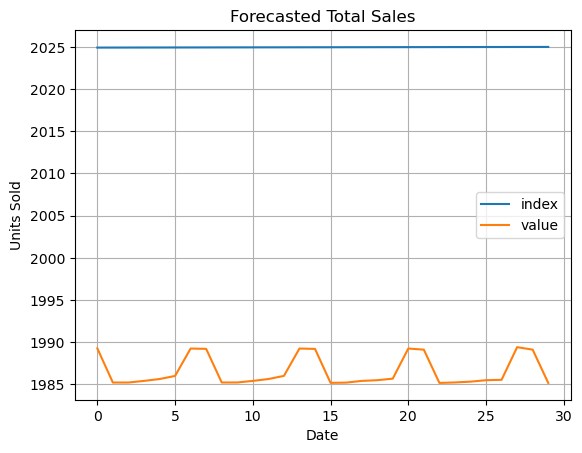

In [27]:
import matplotlib.pyplot as plt

forecast.plot(title="Forecasted Total Sales")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()


In [32]:
# current forecast DataFrame already has these columns:
# ['level_0', 'index', 'value', 'type']

# just selecting and renameing without resetting index again
forecast_cleaned = forecast[['index', 'value']].copy()
forecast_cleaned.columns = ['date', 'value']
forecast_cleaned['type'] = 'forecast'



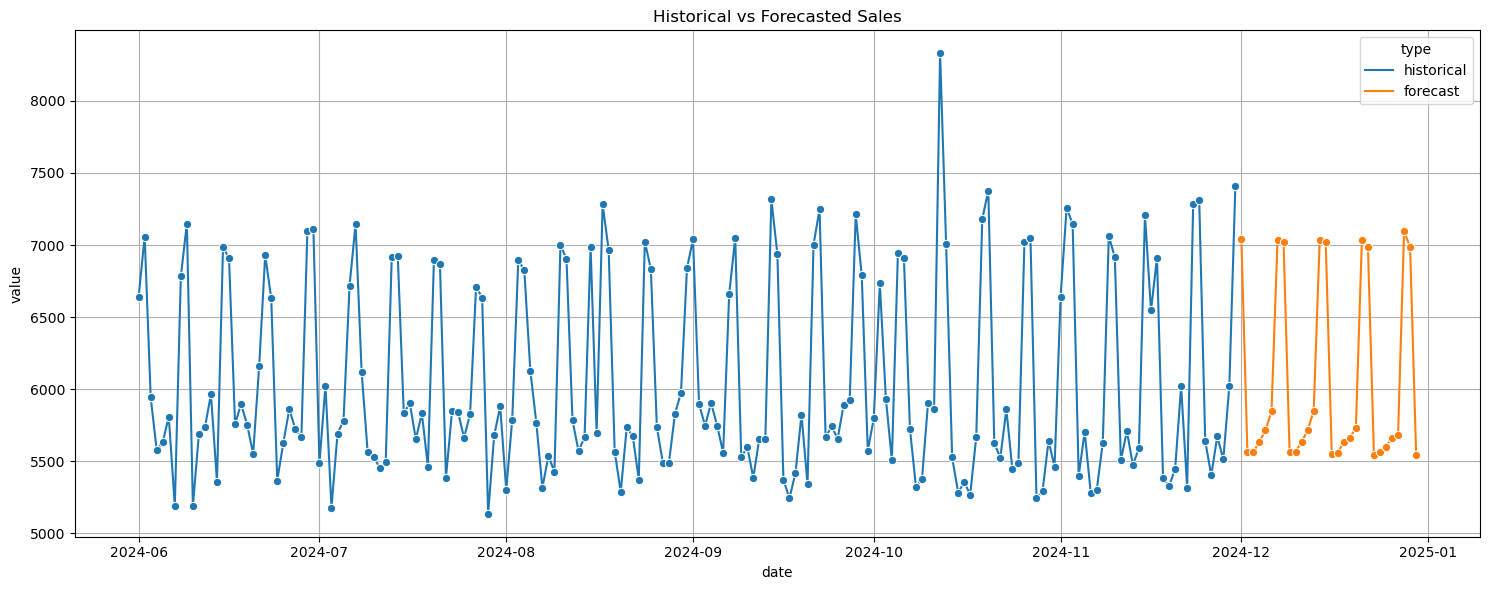

In [33]:
# Prepare historical data
df_past = dataset.groupby('date')['units_sold'].sum().reset_index()
df_past.columns = ['date', 'value']
df_past['type'] = 'historical'

combined = pd.concat([df_past, forecast_cleaned], ignore_index=True)

plt.figure(figsize=(15, 6))
sns.lineplot(data=combined, x='date', y='value', hue='type', marker='o')
plt.title("Historical vs Forecasted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# Show leaderboard of models evaluated
print(model.results().head())

# Best model and its validation performance
print(model.results().iloc[0])


                                    ID              Model  \
854   d8bd60351c03557d2b76a1f72be762ff  AverageValueNaive   
856   14bf818ef1b5ae8161dc491840d9a243  AverageValueNaive   
857   ed6bfe1aea529d6c63c707fb18c0f65f  AverageValueNaive   
1065  5cea3dafa4174c772cd3d0557df121fa           Ensemble   
1058  5ee48af525ac4f55bb27a6023015609b           Ensemble   

                                        ModelParameters  \
854                  {"method": "Mean", "window": null}   
856         {"method": "Weighted_Mean", "window": null}   
857         {"method": "Weighted_Mean", "window": null}   
1065  {"model_name": "BestN", "model_count": 5, "mod...   
1058  {"model_name": "BestN", "model_count": 3, "mod...   

                               TransformationParameters  \
854   {"fillna": "rolling_mean_24", "transformations...   
856   {"fillna": "ffill_mean_biased", "transformatio...   
857   {"fillna": "ffill_mean_biased", "transformatio...   
1065                                      

In [36]:
import joblib
joblib.dump(model, 'autos_model.pkl')


['autos_model.pkl']